# Q1 Fuzzy Clustering using EM

Given the training data EM `Points.mat`, you should implement the Fuzzy Clustering using EM algorithm for clustering.

The dataset contains **400 2D points totally with 2 clusters**. Each point is in the format of `[Xcoordinate, Y-coordinate, label]`.

You are required to implement Fuzzy Clustering using the EM algorithm.
1. You are **NOT** allowed to use any existing EM library. You need to implement it manually and submit your code.
2. Report the updated centers and SSE for the first two iterations. (If you set any hyper parameter when computing SSE, please write it clearly in the report.)
3. Report the final converged centers for each cluster.
4. In your report, draw the clustering results of your implemented algorithm and compare it with the original labels in the dataset. You need to discuss the result briefly.

>Hint: For terminate condition, you can consider the change of parameters or the max iterations.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [86]:
points = loadmat("EM_Points.mat")["Points"]
points

array([[-0.3005007 ,  0.71622977,  0.        ],
       [-0.07260801,  1.39849283,  0.        ],
       [-0.209947  ,  1.32075583,  0.        ],
       ...,
       [ 1.42954638,  0.15714956,  1.        ],
       [ 1.14187298, -0.21691986,  1.        ],
       [ 1.49161487, -0.50410824,  1.        ]])

Assume $o_i$ represents the `i-th` object and $c_j$ represents the `j-th` center. The sum of the squared error is computed by

$$
SSE(C) = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij}^2 \cdot dist(o_i, c_j)^2
$$

In [129]:
class FuzzyClusteringEM:
    def __init__(self, n_clusters, init_centroid, iteration):
        self.n_clusters = n_clusters
        self.init_centroid = init_centroid
        self.iteration = iteration
        
    def fit(self, X):
        c0 = self.init_centroid[0]
        c1 = self.init_centroid[1]
        M = np.zeros((2, X.shape[0]))
        for i in range(self.iteration):
            # calculate the distance from object to center
            dist_c0 = np.sum(np.square(X[:,:2] - c0), axis=1) # (n,)
            dist_c1 = np.sum(np.square(X[:,:2] - c1), axis=1) # (n,)
            dist = dist_c0 + dist_c1
 
            # calculate M matrix
            M = np.vstack((dist_c1/dist, dist_c0/dist)) # 2*n
 
            # calculate the new centroids
            c = np.square(M).dot(X[:,:2]) / np.sum(np.square(M), axis=1, keepdims=True)
        
            # compute SSE (sum of squared error)
            SSE = np.sum(np.dot(M, dist.reshape(-1,1)))
            
            
            # print the results
            print("iteration = %s" % i)
            print("SSE = %s" % SSE)
            print("C = ")
            print(c)
            print()

            # update new centroids
            c0 = c[0]
            c1 = c[1]
        
        # Store the predicted labels
        self.labels_ = np.argmax(M, axis=0)
    

In [130]:
initc = np.array([[1,1],[2,2]])
clustering = FuzzyClusteringEM(n_clusters=2, init_centroid=initc, iteration=15)
clustering.fit(points)

iteration = 0
SSE = 2736.85356381059
C = 
[[0.53866521 0.55193537]
 [0.47385793 0.60978921]]

iteration = 1
SSE = 843.9834427951757
C = 
[[0.60141888 0.46557221]
 [0.43167368 0.63543004]]

iteration = 2
SSE = 853.136429962037
C = 
[[0.7256404  0.32912566]
 [0.3051053  0.77335614]]

iteration = 3
SSE = 916.4451127184844
C = 
[[0.90598324 0.1294149 ]
 [0.11855499 0.9793926 ]]

iteration = 4
SSE = 1110.1403696459276
C = 
[[1.01083941 0.01034638]
 [0.00611246 1.09897161]]

iteration = 5
SSE = 1280.5986090052068
C = 
[[ 1.03788056 -0.02172753]
 [-0.02550994  1.12770828]]

iteration = 6
SSE = 1332.1077668490504
C = 
[[ 1.04306219 -0.02775795]
 [-0.03212375  1.13224185]]

iteration = 7
SSE = 1342.0417119896747
C = 
[[ 1.0440722  -0.02874075]
 [-0.03347604  1.13280377]]

iteration = 8
SSE = 1343.7784180355056
C = 
[[ 1.04429125 -0.02887354]
 [-0.03377623  1.13283733]]

iteration = 9
SSE = 1344.0801570081221
C = 
[[ 1.04434439 -0.02888064]
 [-0.03385258  1.13282462]]

iteration = 10
SSE = 1344.

We set two initial centroids

$$
C_1 = (1,1), C_2 = (2,2)
$$

In the first three iterations, the updated centers and SSE

|Iteration|Updated Centers|SSE   |
|---------|---------------|------|
|0      | $$C_1=(0.539,0.552),C_2=(0.474,0.610)$$  | 2736.853|
|1      | $$C_1=(0.601,0.466),C_2=(0.432,0.635)$$  | 843.983 |
|2      | $$C_1=(0.726,0.329),C_2=(0.305,0.773)$$  | 853.136 |

After about 10 iterations, we can get the final converged centers

$$
C_1 = (1.04,-0.0289), C_2 = (-0.0339,1.133)
$$


In [173]:
pred_labels = clustering.labels_
points_pred = np.hstack((points[:,:2], pred_labels.reshape(-1,1))) # hstack points with predicted labels
dfA = pd.DataFrame(points_pred) # points with predicted labels
dfB = pd.DataFrame(points) # points with original labels

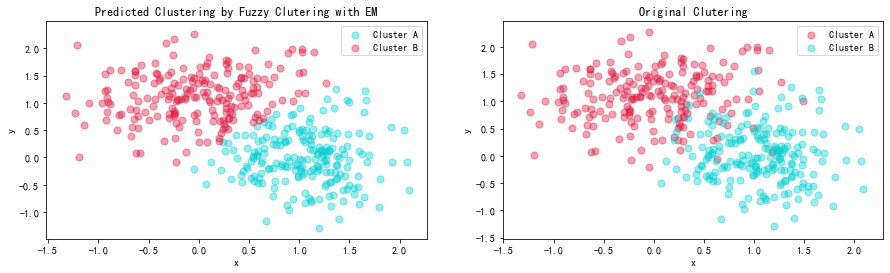

In [181]:
fig = plt.figure(figsize=(15,4))
fig1 = plt.subplot(1,2,1)
fig2 = plt.subplot(1,2,2)

# plot sub figure 1
plt.sca(fig1)
plt.title("Predicted Clustering by Fuzzy Clutering with EM")
plt.xlabel('x')
plt.ylabel('y')
area = np.pi * 4**2   

x0 = dfA[dfA[2]==0][0]
y0 = dfA[dfA[2]==0][1]
x1 = dfA[dfA[2]==1][0]
y1 = dfA[dfA[2]==1][1]

plt.scatter(x0, y0, s=area, c='#00CED1', alpha=0.4, label='Cluster A')
plt.scatter(x1, y1, s=area, c='#DC143C', alpha=0.4, label='Cluster B')
plt.legend()

# plot sub figure 2
plt.sca(fig2)
plt.title("Original Clutering")
plt.xlabel('x')
plt.ylabel('y')
area = np.pi * 4**2   

x0 = dfB[dfB[2]==0][0]
y0 = dfB[dfB[2]==0][1]
x1 = dfB[dfB[2]==1][0]
y1 = dfB[dfB[2]==1][1]

plt.scatter(x0, y0, s=area, c='#DC143C', alpha=0.4, label='Cluster A')
plt.scatter(x1, y1, s=area, c='#00CED1', alpha=0.4, label='Cluster B')
plt.legend()

plt.show()

According to the figures we draw, we can clearly see that predicted clustering has a more distinct boundary than the clutering divided by original labels. I have drawed the clutering boundary below:

![analysis](analysis.png)

We can easily draw a line to distinguish two cluters in the left figure. However, in the figure on the right, though we widen the boundary, there are still some outliers existing. This is because in reality, the noise exists which would make some points fluctuate near the classification boundary. However, The algorithm just consider the ideal situation and cannot consider noise.